#  **<center><font style="color:rgb(100,109,254)">Contour Detection 101 Part 3: Contour Analysis</font></center>**

In part 1 of contour detection 101, we learned the basics, how to detect and draw the contours, in part 2 we learned to do some contour manipulations. In this part we will look into some techniques used for analyzing contours.This is really important because by doing contour analysis you can actually recognize the identity of the object being detected and differentiate one contour from another.

### **<font style="color:rgb(134,19,348)">Import the Libraries</font>**

Let's start by importing the required libraries.

In [10]:
import cv2
import math
import numpy as np
import pandas as pd
import transformations
import matplotlib.pyplot as plt

#### **Read the Image**

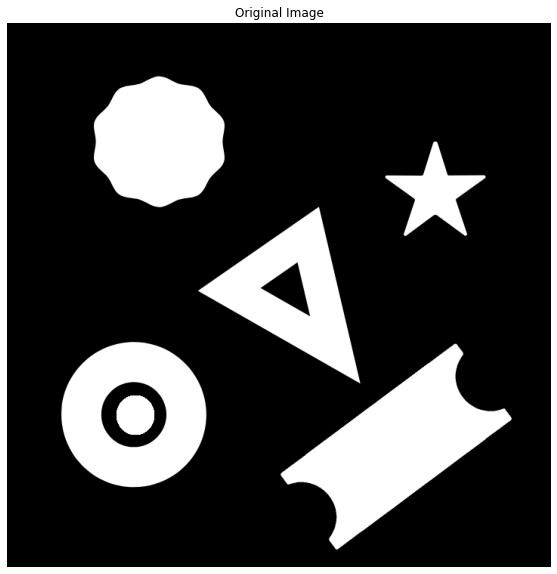

In [11]:
# Read the image
image1 = cv2.imread('media/image.png') 

# Display the image
plt.figure(figsize=[10,10])
plt.imshow(image1[:,:,::-1]);plt.title("Original Image");plt.axis("off");

## **<font style="color:rgb(134,19,348)">Detect and draw Contours</font>**
Next, we will detect and draw external contours on the image using the **`cv2.findContours()`** and **`cv2.drawContours()`** functions.

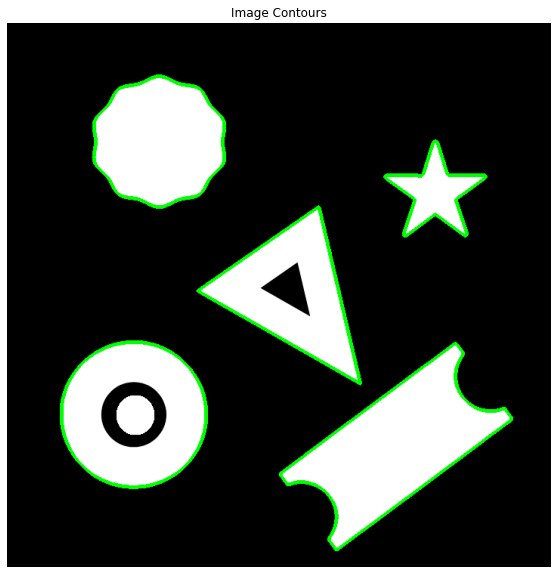

In [12]:
image1_copy = image1.copy()

# Convert to grayscale
gray_scale = cv2.cvtColor(image1_copy,cv2.COLOR_BGR2GRAY)

# Find all contours in the image
contours, hierarchy = cv2.findContours(gray_scale, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all the contours.
contour_image = cv2.drawContours(image1_copy, contours, -1, (0,255,0), 3);

# Display the results.
plt.figure(figsize=[10,10])
plt.imshow(contour_image[:,:,::-1]);plt.title("Image Contours");plt.axis("off");

Once the contours have been detected, they can be further analyzed for their properties. These properties provide valuable information about the object in the image and distinguish it from the other objects in the image. Below we will look at how to retrieve some of these properties.

## **<font style="color:rgb(134,19,348)">Image Moments</font>**

Image moments are like the weighted average of the pixel intensities in the image, they help you to calculate some features like the center of mass of the object, area of the object, etc. 
We can get the image moment of this contour by using the function **`cv2.moments()`** which gives us a dictionary of various properties to use.

**Function Syntax:**

> [**`retval = cv.moments(array)`**](https://docs.opencv.org/4.2.0/d8/d23/classcv_1_1Moments.html#a0382b98fdb23acdcb05c91a2a44e5a1f)


**Parameters:**

* **`array`** - Single-channel, 8-bit or floating-point 2D array

**Returns:**

* **`retval`** - A python dictionary containing different moments properties 

In [13]:
# Select a contour
contour = contours[1]

# get its moments
M = cv2.moments(contour)

# print all the moments
print(M)

{'m00': 28977.5, 'm10': 4850112.666666666, 'm01': 15004570.666666666, 'm20': 878549048.4166666, 'm11': 2511467783.458333, 'm02': 7836261882.75, 'm30': 169397190630.30002, 'm21': 454938259986.68335, 'm12': 1311672140996.85, 'm03': 4126888029899.3003, 'mu20': 66760837.58548939, 'mu11': 75901.88486719131, 'mu02': 66884231.43453884, 'mu30': 1727390.3746643066, 'mu21': -487196.02967071533, 'mu12': -1770390.7230567932, 'mu03': 495214.8310546875, 'nu20': 0.07950600793808808, 'nu11': 9.03921532296414e-05, 'nu02': 0.07965295864597088, 'nu30': 1.2084764986041665e-05, 'nu21': -3.408407043976586e-06, 'nu12': -1.238559397771768e-05, 'nu03': 3.4645063088656135e-06}


The values returned represent different kinds of image movements including raw moments, central moments, scale/rotation invariant moments, and so on. For more information on image moments and how they are calculated you can read [this](https://en.wikipedia.org/wiki/Image_moment) wikipedia article. Below we will discuss how some of the image moments returned can be used to analyze the contours detected.

## **<font style="color:rgb(134,19,348)">Find the center of a contour</font>**


The image moments calculated above can be used to find the centroid of the object in the image. The coordinate of the Centroid is given by two relations the central image moments, ${Cx = \frac{M10}{M00}}$ and ${Cy = \frac{M01}{M00}}$.

In [14]:
# Calculate the X-coordinate of the centroid
cx = int(M['m10'] / M['m00'])

# Calculate the Y-coordinate of the centroid
cy = int(M['m01'] / M['m00'])

# Print the centroid point
print('Centroid: ({},{})'.format(cx,cy))

Centroid: (167,517)


Now we can repeat the process for the rest of the contours detected in the image and draw a circle using [**`cv2.circle()`**](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670) to indicate the centroids on the image.

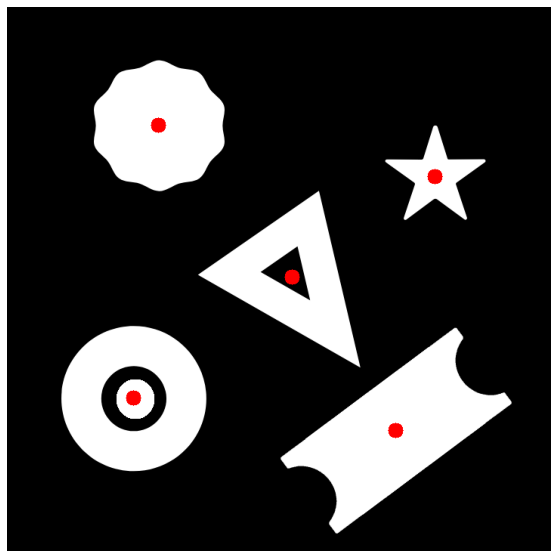

In [15]:
image1_copy = image1.copy()

# Loop over the contours
for contour in contours:

    # Get the image moments for the contour
    M = cv2.moments(contour)
    
    # Calculate the centroid
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    # Draw a circle to indicate the contour
    cv2.circle(image1_copy,(cx,cy), 10, (0,0,255), -1)

# Display the results
plt.figure(figsize=[10,10])
plt.imshow(image1_copy[:,:,::-1]);plt.axis("off");

## **<font style="color:rgb(134,19,348)">Finding Contour Area</font>**
Area for a contour can be found using two methods. One is using the function **`cv.contourArea()`** as we have done before for sorting and retrieving the largest contour.

In [16]:
# Select a contour
contour = contours[1]

# Get the area of the selected contour
area_method1 = cv2.contourArea(contour)

print('Area:',area_method1)

Area: 28977.5


Another method is to get the **`m00`** moment which contains the area of the contour.

In [17]:
# get selected contour moments
M = cv2.moments(contour)

# Get the moment containing the Area
area_method2 = M['m00']

print('Area:',area_method2)

Area: 28977.5


## **<font style="color:rgb(134,19,348)">Contour Properties</font>**
When building an application using contours, information about contour properties is vital. These properties are often invariant to one or more transformations such as translation, scaling, and rotation. Below, we will have a look at some of these properties.

Let's start by detecting external contours of an image.

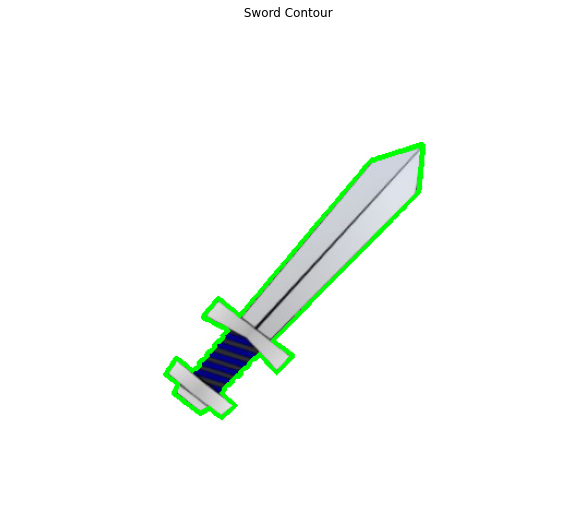

In [18]:
# Read the image
image4 = cv2.imread('media/sword.jpg') 

# Create a copy 
image4_copy = image4.copy()

# Convert to gray-scale
imageGray = cv2.cvtColor(image4_copy,cv2.COLOR_BGR2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(imageGray, 220, 255, cv2.THRESH_BINARY_INV)

# Detect and draw external contour
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Select a contour
contour = contours[0]

# Draw the selected contour
cv2.drawContours(image4_copy, contour, -1, (0,255,0), 3)

# Display the result
plt.figure(figsize=[10,10])
plt.imshow(image4_copy[:,:,::-1]);plt.title(" Sword Contour");plt.axis("off");

Now using a custom **`transform()`** function from the **`transformation.py`** module we can conveniently apply and display different transformations to an image.

#### **Function Syntax:**
>**`transformations.transform(translate=True, scale=False, rotate=False, path='media/sword.jpg', display=True)`**

By default only translation is applied but you may scale and rotate the image as well.

Applied Translation of x: 44 , y: 30
Applied rotation of angle: 80
Image resized to: 95.0%


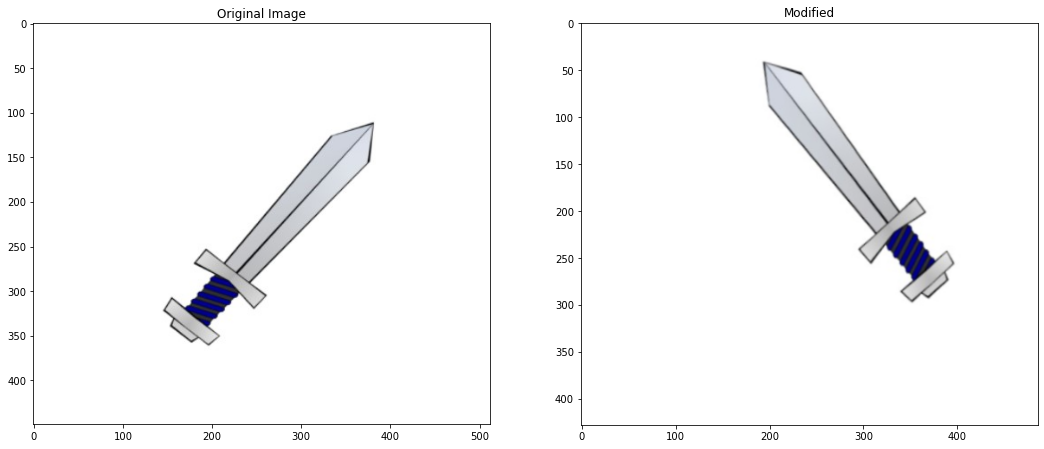

In [21]:
modified_contour = transformations.transform(rotate = True,scale=True)

### **<font style="color:rgb(134,19,348)">Aspect ratio</font>**
Aspect ratio is the ratio of width to height of the bounding rectangle of an object. It can be calculate as  ${ AR = \frac{width}{height}}$. The aspect ratio property of an object is invariant to translation.

Aspect ratio intitially 0.9442231075697212
Applied Translation of x: -45 , y: -49
Aspect ratio After Modification 0.9442231075697212


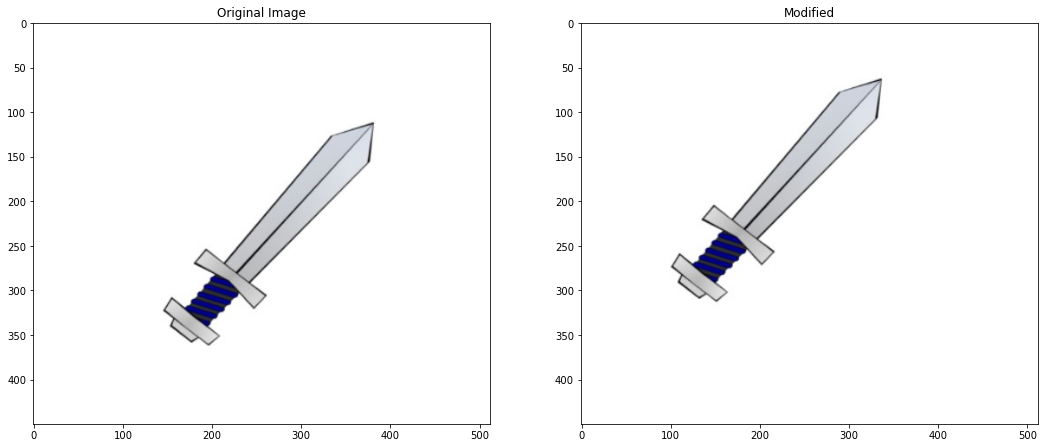

In [23]:
# Get the up-right bounding rectangle for the image
x,y,w,h = cv2.boundingRect(contour)

# calculate the aspect ratio
aspect_ratio = float(w)/h
print("Aspect ratio intitially {}".format(aspect_ratio))

# Apply translation to the image and get its detected contour
modified_contour = transformations.transform(translate=True)

# Get the bounding rectangle for the detected contour
x,y,w,h = cv2.boundingRect(modified_contour)

# Calculate the aspect ratio for the modified contour
aspect_ratio = float(w)/h
print("Aspect ratio After Modification {}".format(aspect_ratio)) 

### **<font style="color:rgb(134,19,348)">Extent </font>**

Extent is the ratio of contour area to bounding rectangle area. Its invariant to Translation & Scaling. To find the extend we start by calculating the contour area for the selected contour using the function **`cv2.contourArea()`**. Next, the bounding rectangle is found using **`cv2.boundingRect()`**. The area of bounding rectangle is calculated using ${ rect\;area = {width}\times{height}}$. The extent is then calculated as ${ extent = \frac{contour\;area}{rect\;area}}$.

Extent intitially 0.2404054667406324
Applied Translation of x: 38 , y: 44
Image resized to: 117.0%
Extent After Modification 0.24218788234718347


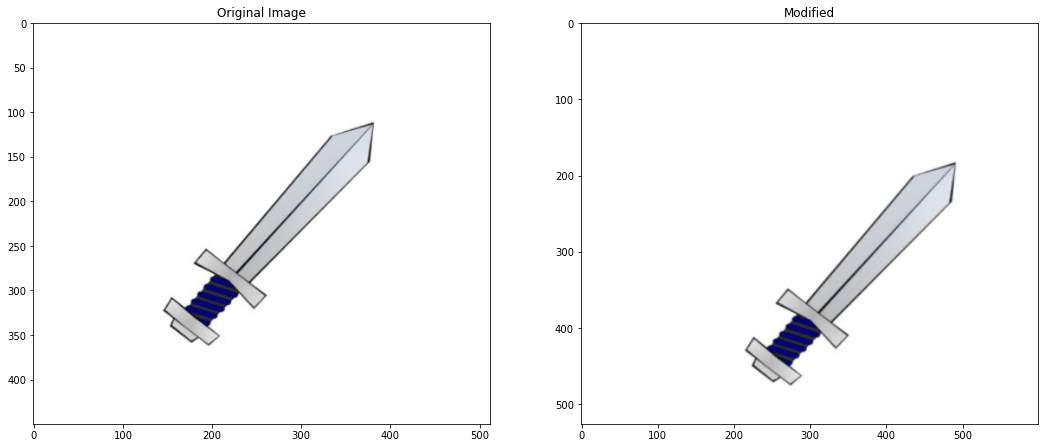

In [24]:
# Calculate the area for the contour
original_area = cv2.contourArea(contour)

# find the bounding rectangle for the contour
x,y,w,h = cv2.boundingRect(contour)

# calculate the area for the bounding rectangle
rect_area = w*h

# calcuate the extent
extent = float(original_area)/rect_area
print("Extent intitially {}".format(extent))

# apply scaling and translation to the image and get the contour
modified_contour = transformations.transform(translate=True,scale = True)

# Get the area of modified contour
modified_area = cv2.contourArea(modified_contour)

# Get the bounding rectangle
x,y,w,h = cv2.boundingRect(modified_contour)

# Calculate the area for the bounding rectangle
modified_rect_area = w*h

# calcuate the extent
extent = float(modified_area)/modified_rect_area

print("Extent After Modification {}".format(extent))

### **<font style="color:rgb(134,19,348)">Equivalent Diameter </font>**
Equivalent Diameter is the diameter of the circle whose area is same as the contour area. It is Invariant to Translation & Rotation. The equivalent diameter can be calculated by first getting the area of contour by **`cv2.boundingRect()`**, the area of circle is given by ${ area = 2\times{\pi}\times{\frac{d}{4}}^{2}}$ where ${d}$ is the diameter of circle. 

So we can find diameter by changing the above equation which will give us:  ${ d =\sqrt[2]{\frac{4\times{rectArea}}{\pi}}}$.

Equi diameter intitially 134.93924087995146
Applied Translation of x: -39 , y: 38
Applied rotation of angle: 38
Equi diameter After Modification 135.06184863765444


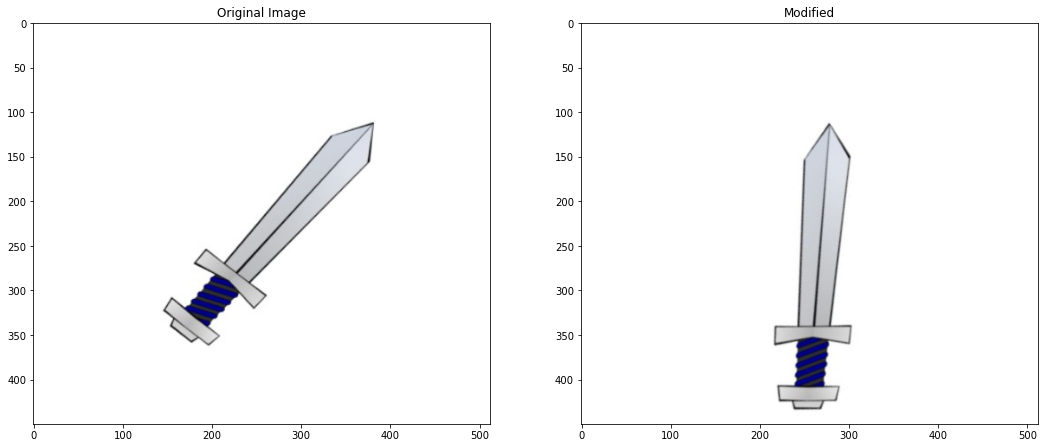

In [25]:
# Calculate the diameter
equi_diameter = np.sqrt(4*original_area/np.pi)
print("Equi diameter intitially {}".format(equi_diameter))

# Apply rotation and transformation
modified_contour = transformations.transform(rotate= True)

# Get the area of modified contour
modified_area = cv2.contourArea(modified_contour)

# Calculate the diameter
equi_diameter = np.sqrt(4*modified_area/np.pi)
print("Equi diameter After Modification {}".format(equi_diameter))

### **<font style="color:rgb(134,19,348)">Orientation </font>**
Orientation is the angle at which object is rotated. 

Applied Translation of x: 48 , y: -37
Applied rotation of angle: 176


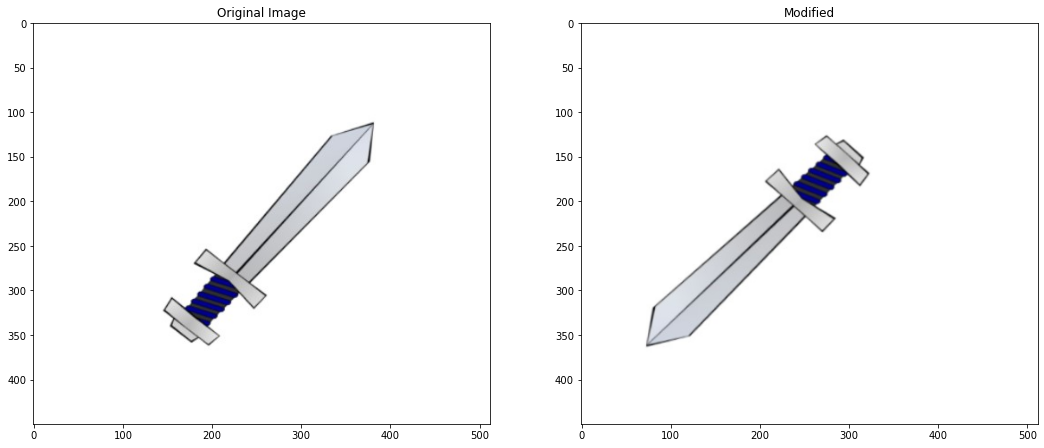

In [30]:
# Rotate and translate the contour
modified_contour = transformations.transform(translate=True,rotate= True,display = True)

**Now Let's take a look at an elliptical angle on the sword contour above**

In [31]:
# Fit and ellipse onto the contour similarly to minimum area rectangle
(x,y),(MA,ma),angle = cv2.fitEllipse(modified_contour)

# Print the angle of rotation of ellipse
print("Elliptical Angle is {}".format(angle))

Elliptical Angle is 46.882904052734375


**Below method also gives the angle of the contour by fitting a rotated box instead of an ellipse**

In [32]:
(x,y),(w,mh),angle = cv2.minAreaRect(modified_contour)
print("RotatedRect Angle is {}".format(angle))

RotatedRect Angle is 45.0


**Note:** *Don't be confused by why all three angles are showing different results, they all calculate angles differently , for e.g  ellipse fits an ellipse and then calculates the angle that an ellipse makes, similarly the rotated rect calculates the angle the rectangle makes. For triggering decisions based on calculated angle you would first need to find what angle the respective method is making at the given orientations of object.*

## **<font style="color:rgb(134,19,348)">Hu moments</font>**

Hu moments are a set of 7 numbers calculated using the central moments. The first ***6*** of the Hu moments are invariant to translation, scaling, rotation and reflection. The ***7th*** Hu moment is also invariant to these transformations, except that it changes its sign in case of reflection. Below we will calculate the Hu moments for the sword contour, using the moments of the contour.

You can read [this paper](https://www.researchgate.net/publication/224146066_Analysis_of_Hu's_moment_invariants_on_image_scaling_and_rotation), if you want to know more about hu-moments and how they are calculated.

In [35]:
# Calculate moments
M = cv2.moments(contour)

# Calculate Hu Moments
hu_M = cv2.HuMoments(M)

print(hu_M)

[[5.69251998e-01]
 [2.88541572e-01]
 [1.37780830e-04]
 [1.28680955e-06]
 [2.45025329e-12]
 [3.54895392e-07]
 [1.69581763e-11]]


As you can see the different hu-moments have varying ranges (e.g. compare hu-moment 1 and 7) so to make the Hu-moments more comparable with each other, we will transform them to log-scale and bring them them all to a same range.

In [36]:
# Log scale hu moments 
for i in range(0,7):
  hu_M[i] = -1* math.copysign(1.0,  hu_M[i]) * math.log10(abs(hu_M[i]))

df = pd.DataFrame(hu_M,columns=['Hu-moments of original Image']) 
df

,Hu-moments of original Image
0,0.244695
1,0.539792
2,3.860811
3,5.890486
4,11.610789
5,6.449900
6,10.770621


Applied Translation of x: -31 , y: 48
Applied rotation of angle: 122
Image resized to: 87.0%


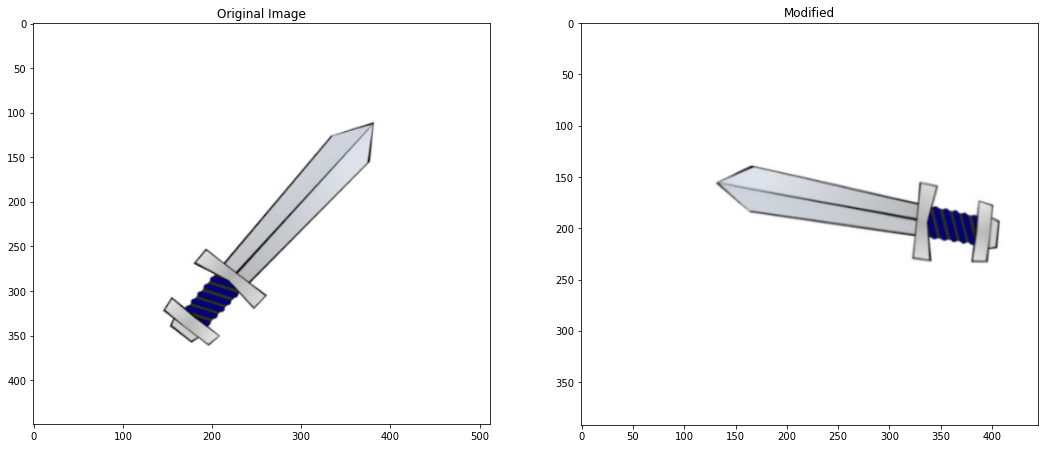

In [38]:
# Apply translation to the image and get its detected contour
modified_contour = transformations.transform(translate = True, scale = True, rotate = True)

In [39]:
# Calculate moments
M_modified = cv2.moments(modified_contour)

# Calculate Hu Moments
hu_Modified = cv2.HuMoments(M_modified)

# Log scale hu moments 
for i in range(0,7):
    hu_Modified[i] = -1* math.copysign(1.0, hu_Modified[i]) * math.log10(abs(hu_Modified[i]))

df['Hu-moments of Modified Image'] = hu_Modified
df

,Hu-moments of original Image,Hu-moments of Modified Image
0,0.244695,0.245247
1,0.539792,0.540865
2,3.860811,3.803099
3,5.890486,5.394441
4,11.610789,10.116567
5,6.449900,5.735110
6,10.770621,10.174775


**Resources:**

- https://learnopencv.com/shape-matching-using-hu-moments-c-python/